# INTRODUCTION
This is a project that builds an end to end Machine learning pipeline and deploy it as an API.
The Tools used are Pycaret and deployment of the app in Heroku.


In [4]:
# First install pycaret and other libraries to be used in this project
#Installing pycaret

In [3]:
pip install pycaret[full]

Note: you may need to restart the kernel to use updated packages.


In [ ]:
#install FastAPI

In [ ]:
# pip install fastapi

# DATA

In [ ]:
#The Project will use dataset from pycaret dataset house
#The goal of the tutorial is to predict the house price based on its features like Lot area, Utilities, Lot frontage, sale condition etc.
#The data can be obtained from PyCaret’s repository. https://github.com/pycaret/pycaret/tree/master/datasets

In [ ]:
#Import Pycaret, then we load the dataset of the house into python.

In [ ]:
# import pycaret

In [7]:
from pycaret.datasets import get_data
House_Data = get_data('house')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
#Drop Columns, If any with missing Values.

In [28]:
House_Data_1= House_Data.dropna(axis=1)
print(House_Data_1)

        Id  MSSubClass MSZoning  LotArea Street LotShape LandContour  \
0        1          60       RL     8450   Pave      Reg         Lvl   
1        2          20       RL     9600   Pave      Reg         Lvl   
2        3          60       RL    11250   Pave      IR1         Lvl   
3        4          70       RL     9550   Pave      IR1         Lvl   
4        5          60       RL    14260   Pave      IR1         Lvl   
...    ...         ...      ...      ...    ...      ...         ...   
1455  1456          60       RL     7917   Pave      Reg         Lvl   
1456  1457          20       RL    13175   Pave      Reg         Lvl   
1457  1458          70       RL     9042   Pave      Reg         Lvl   
1458  1459          20       RL     9717   Pave      Reg         Lvl   
1459  1460          20       RL     9937   Pave      Reg         Lvl   

     Utilities LotConfig LandSlope  ... EnclosedPorch 3SsnPorch ScreenPorch  \
0       AllPub    Inside       Gtl  ...             0   

In [ ]:
#Drop Rows, If any with missing Values.

In [29]:
House_Data_2 = House_Data_1.dropna()
print(House_Data_2)

        Id  MSSubClass MSZoning  LotArea Street LotShape LandContour  \
0        1          60       RL     8450   Pave      Reg         Lvl   
1        2          20       RL     9600   Pave      Reg         Lvl   
2        3          60       RL    11250   Pave      IR1         Lvl   
3        4          70       RL     9550   Pave      IR1         Lvl   
4        5          60       RL    14260   Pave      IR1         Lvl   
...    ...         ...      ...      ...    ...      ...         ...   
1455  1456          60       RL     7917   Pave      Reg         Lvl   
1456  1457          20       RL    13175   Pave      Reg         Lvl   
1457  1458          70       RL     9042   Pave      Reg         Lvl   
1458  1459          20       RL     9717   Pave      Reg         Lvl   
1459  1460          20       RL     9937   Pave      Reg         Lvl   

     Utilities LotConfig LandSlope  ... EnclosedPorch 3SsnPorch ScreenPorch  \
0       AllPub    Inside       Gtl  ...             0   

In [31]:
House_Data_2.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


# Exploratory Data Analysis

In [ ]:
visualization to assess the relationship of independent features (weight, cut, color, clarity, etc.) with the target variable i.e. Price

In [32]:
# plot scatter LotArea and Price
import plotly.express as px
fig = px.scatter(x=House_Data_2['LotArea'], y=House_Data_2['SalePrice'], 
                 facet_col = House_Data_2['YrSold'], opacity = 0.25, template = 'plotly_dark', trendline='ols',
                 trendline_color_override = 'red', title = 'PRICES OF HOUSES')
fig.show()

# Distribution of target Variable, Sale Price

In [ ]:
#Plotting a Histogram will enable us visualize the data and draw inferences of the distribution.

In [33]:
# plot histogram
fig = px.histogram(House_Data_2, x=["SalePrice"], template = 'plotly_dark', title = 'Histogram of Price')
fig.show()

In [ ]:
# The above Histogram shows the distribution of the data to be rightly skewed.
# To normalize the data, we will get log transform the data.
#Import numpy
# First we make a copy of the data.

In [35]:
import numpy as np
# create a copy of data
House_Data_2_copy = House_Data_2.copy()
# create a new feature Log_SalePrice
House_Data_2_copy['Log_SalePrice'] = np.log(House_Data_2['SalePrice'])
# plot histogram
fig = px.histogram(House_Data_2_copy, x=["Log_SalePrice"], title = 'Histgram of Log SalePrice', template = 'plotly_dark')
fig.show()

In [ ]:
#The Data is now normal. The target variable SalePrice is approximately normal.

# Prepare the Data
We next prepare the data using Pycaret, Initialize the set up, check the variables and assess Multicollinearity if any and missing values...etc.
After this step we will model and train the data.

In [36]:
from pycaret.regression import *
s = setup(House_Data_2, target = 'SalePrice', transform_target = True)

,Description,Value
0,session_id,4415
1,Target,SalePrice
2,Original Data,"(1460, 62)"
3,Missing Values,False
4,Numeric Features,16
5,Categorical Features,45
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(1021, 330)"


# Model Training & Selection

In [ ]:
#Here we use Pycarets functionality of Compare models, and cross validation.

In [37]:
# compare all models
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,15496.3481,743705560.8386,26519.2293,0.8876,0.1289,0.0895,1.9920
lightgbm,Light Gradient Boosting Machine,17354.8023,817917740.0579,28028.4316,0.8753,0.1411,0.1011,0.2030
gbr,Gradient Boosting Regressor,17149.8138,841039486.4004,28107.1732,0.8743,0.1346,0.0974,0.1520
xgboost,Extreme Gradient Boosting,18614.3731,959604610.4124,30211.0024,0.8532,0.1500,0.1073,0.3880
rf,Random Forest Regressor,18511.3053,1074247399.7734,31677.8371,0.8396,0.1530,0.1070,0.3150
et,Extra Trees Regressor,21335.1477,1368035350.0622,36028.9766,0.7902,0.1735,0.1201,0.3690
ada,AdaBoost Regressor,25641.0382,1592978311.3420,39066.0558,0.7571,0.1876,0.1404,0.1150
dt,Decision Tree Regressor,28194.3621,2196982734.2979,45535.1646,0.6624,0.2204,0.1596,0.0220
knn,K Neighbors Regressor,31436.3481,2538218799.6548,49045.4432,0.6178,0.2343,0.1786,0.0320
lr,Linear Regression,20275.4764,4548164260.9470,49553.9987,0.2234,0.1747,0.1180,0.4650


In [ ]:
#According to the above results, the best model is the 'CatBoost Regressor' It has the lowest Mean Absolute Error (MAE) amongst all the models.

In [ ]:
#We also check model residuals of the model we have trained.

In [38]:
# check the residuals of trained model
plot_model(best, plot = 'residuals_interactive')

    'data': [{'hovertemplate': 'Split=train<br>Predictions…

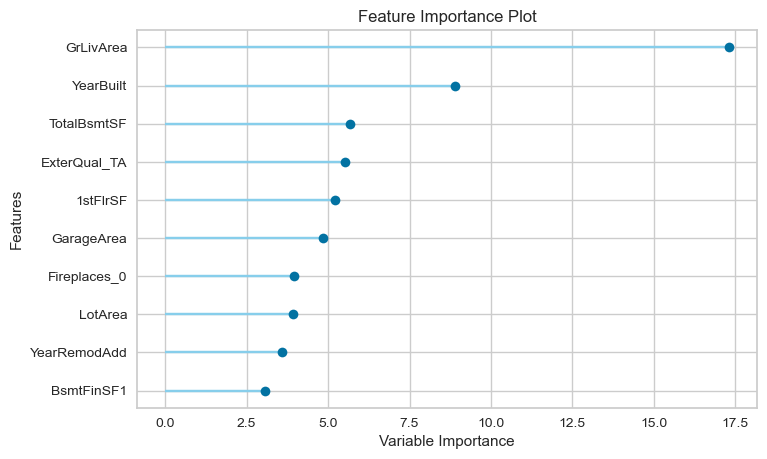

In [39]:
# check feature importance
plot_model(best, plot = 'feature')

# Finalizing of Model Training and Saving the ML pipeline

In [40]:
# finalize the model
final_best = finalize_model(best)
# save model to disk
save_model(final_best, 'House_Data_2-pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=['Id'],
                                       ml_usecase='regression',
                                       numerical_features=[], target='SalePrice',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_st...
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),
                 ['trained_model',
                  PowerTransformedTargetRegressor(border_count=254,
                        